In the neural network that we previously constructed, each unit in the first layer had a weight connecting it separately with every pixel in the image.
But we know that pixels in most images are not independent from their neighbors. For example, images of objects contain edges, and neighboring pixels along an edge tend to have similar patterns. How can we use these correlations to our advantage?

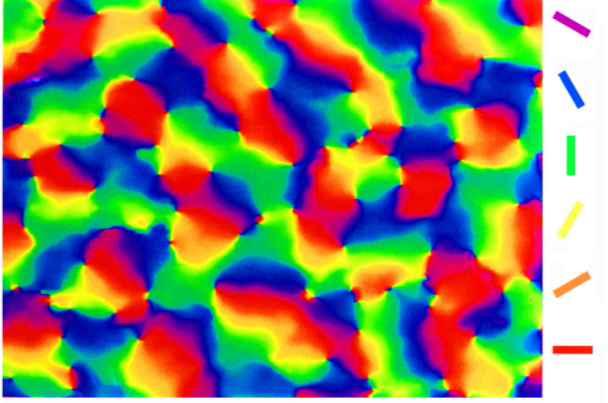


Our own visual system uses these correlations, and each nerve cell in the visual areas in our brain responds to oriented edges at a particular location in the visual field. This image depicts a small part of the visual cortex (the scale bar is 1 millimeter in size). Each part of the image responds to some part of the visual field, and to the orientation depicted by the colors on the right. Looking for the same feature, such as a particular orientation, in every location in an image is like a mathematical operation called a convolution. This is the fundamental operation that convolutional neural networks use to process images.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's start with a simple version: a convolution in one dimension. We create here an array that contains 5 zeros followed by 5 ones. This array contains an "edge" in the middle, where the values go from zero to one. The kernel defines the feature that we are looking for. In this case, we are looking for a change from small values on the left to large values on the right. We start the result as all zeros. Then, we slide the kernel along the array. In each location we multiply the values in the array with the values in the Kernel and sum them up. This is the result for that location.

In [2]:
array = np.array([0,0,0,0,0,1,1,1,1,1])
kernel = np.array([-1,1])

conv = np.array([0,0,0,0,0,0,0,0])

# conv[0] = (kernel * array[0:2]).sum()

for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()

In [3]:
conv

array([0, 0, 0, 0, 1, 0, 0, 0])

In [4]:
array = np.array([0,0,1,1,0,0,1,1,0,0])
kernel = np.array([-1,1])

conv = np.array([0,0,0,0,0,0,0,0])

# conv[0] = (kernel * array[0:2]).sum()

for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()

In [5]:
conv

array([ 0,  1,  0, -1,  0,  1,  0, -1])

In this case, the edges that go from zero to one match the kernel, but the edges from 1 to 0 are the opposite of the kernel. In these locations, the convolution becomes negative.

### One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [7]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()
    
# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


Notice that we've only multiplied the kernel with eight different positions

#### Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [8]:
im = pd.read_csv('./data/brick_bw.csv').to_numpy()


In [9]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()
        
# Print result
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [10]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

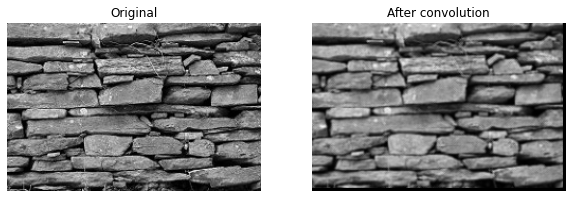

In [11]:
plot_comparison(im, result, 'After convolution')


### Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:

In [23]:
kernel = np.array([[-1, 1, -1], 
          [1, 1, 1], 
          [-1, 1, -1]])

In [17]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

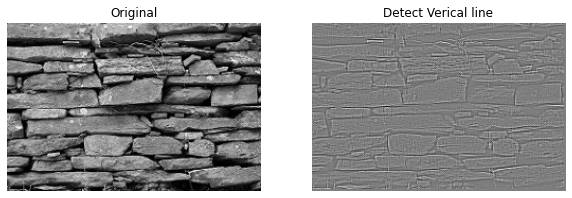

In [24]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detect Verical line')

Define a kernel that finds horizontal lines in images.

In [25]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1 ,-1]])

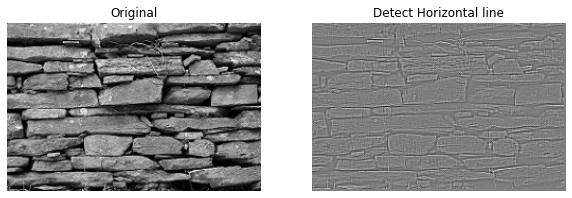

In [26]:
esult = convolution(im, kernel)
plot_comparison(im, result, 'Detect Horizontal line')

Define a kernel that finds a light spot surrounded by dark pixels.

In [27]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

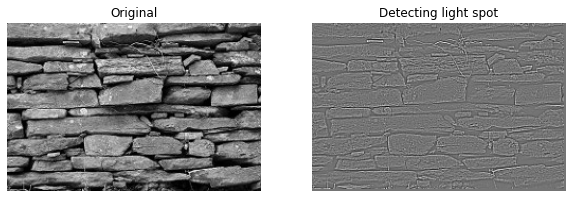

In [28]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting light spot')

Define a kernel that finds a dark spot surrounded by bright pixels.

In [29]:
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

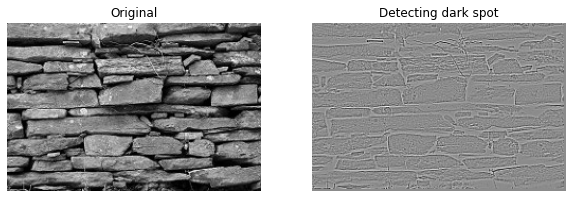

In [30]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting dark spot')

## Implementing convolutions in Keras
Keras has objects to represent convolution layers.

In [32]:
from tensorflow.keras.layers import Conv2D
Conv2D(10, kernel_size = 3, activation = 'relu')

Here, we have a two-dimensional convolution, that we can use to analyze images. It resembles the "Dense" layers, but instead of having every unit in the layer connected to every unit in the previous layer, these connect to the previous layer through a convolution kernel. This means that the output of each unit in this layer is a convolution of a kernel over the image input. Here, we have ten convolution units. During training of a neural network that has convolutional layers, the kernels in each unit would be adjusted using back-propagation. The principle is the same as learning in the Dense layers that we have seen so far, but with fewer weights. A dense layer has one weight for each pixel in the image, but a convolution layer has only one weight for each pixel in the kernel. For example, if we set the kernel_size argument to 3, that means that the kernel of each unit has 9 pixels. If the layer has 10 units, it would have 90 parameters for these kernels.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

img_rows, img_cols = 28, 28

model = Sequential()

# Add a convolutional layer (10 units)
model.add(Conv2D(10, kernel_size=3, input_shape=(img_rows, img_cols, 1), activation='relu'))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
flatten (Flatten)            (None, 6760)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 20283     
Total params: 20,383
Trainable params: 20,383
Non-trainable params: 0
_________________________________________________________________


To build a network that contains a convolution layer, we need to import the Sequential model, and we will need the Dense as well as the Conv2D layers. In addition to these layers, we will also need a Flatten layer. This serves as a connector between convolution and densely connected layers. We initialize a Sequential model and add a first convolution layer. In addition to the function arguments that I showed you before, the number of units, the kernel size and the activation function, here we use the "relu" activation, we also add here the input shape. This is the size of each of the input images to the network. For example, for the images of clothing that we have been using, we might have image_rows and images_cols both equal to 28. To connect this layer to the next one, we add a Flatten layer. This takes the output of the convolution, that we previously referred to as a "feature map", and flattens it into a one-dimensional array. This is the expected input into the densely connected layer that is then added to the network as an output layer. Here, the output is one of three classes of clothing, so there are three units. To classify among the categories represented by the three units, we use the softmax activation function.

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Just like before, the next step is to compile the model, choosing the optimizer, and the loss function that we would like to use for fitting. For classification tasks categorical cross-entropy is an appropriate loss function. We can also specify the metrics we would like to see during training, here just the accuracy. 

### Creating a deep learning network
A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.



In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

img_rows, img_cols = 28, 28

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, input_shape=(img_rows, img_cols, 1), activation='relu'))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


### Train a deep CNN to classify clothing images
Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

In [36]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [37]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Evaluate on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 0s 50ms/step - loss: 5.9376 - accuracy: 0.4750 - val_loss: 0.8703 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 8ms/step - loss: 0.5432 - accuracy: 0.8500 - val_loss: 1.0474e-04 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 998us/step - loss: 2.1696e-06 - accuracy: 1.0000


[2.1695857412851183e-06, 1.0]

## Tweaking your convolutions
Calculating the size of the output
O = ((I - K + 2P) / S) + 1


I= size of the input

K= size of the kernel

P= size of the zero padding

S= strides

### Add padding to a CNN
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [39]:
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

With padding set to 'same', the output layer will have the same size as the input layer

### Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [40]:
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu',
                 input_shape=(img_rows, img_cols, 1),
                 strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

With strides set to 2, the network skips every other pixel.

#### Calculate the size of convolutional layer output
Zero padding and strides affect the size of the output of a convolution.

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?

In [41]:
(256-4 + 2*1)/2+1 

128.0

### How many parameters in a CNN?
We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?

In [38]:
10 * (3 * 3) + 10 + 784 * 10 * 2 + 2

15782